In [189]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [190]:
# read ads_dimension.csv
ads = pd.read_csv("./ads_dimension.csv")
ads.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
1,20230807,1747578422390810,US,USCA,1,24/7/2023,5132.17,4795.25,24/10/2022 14:36,1.78,Auction Ads,auction_relation
2,20230807,1758543228094480,SA,MENA,1,14/6/2023,1976.25,1063.767,22/2/2023 15:50,1.67,RIE,Ad Group Recall (Merged)
3,20230807,1738303151826990,AU,AU,2,24/7/2023,1.7355,5.365,14/7/2022 5:00,1.84,Auction Ads,auction_relation
4,20230807,1738303920938010,NZ,NZ,2,24/7/2023,NaN,5.365,14/7/2022 5:16,1.58,Auction Ads,auction_relation


In [191]:
# name columns
ads.columns = ads.iloc[0]

# drop first row and reset index
ads.drop(index = ads.index[0], axis = 0, inplace = True)
ads = ads.reset_index(drop=True)
ads.head()

,p_date,ad_id,delivery_country,queue_market,punish_num,latest_punish_begin_date,ad_revenue,avg_ad_revenue,start_time,baseline_st,product_line,task_type_en
0,20230807,1747578422390810,US,USCA,1,24/7/2023,5132.17,4795.25,24/10/2022 14:36,1.78,Auction Ads,auction_relation
1,20230807,1758543228094480,SA,MENA,1,14/6/2023,1976.25,1063.767,22/2/2023 15:50,1.67,RIE,Ad Group Recall (Merged)
2,20230807,1738303151826990,AU,AU,2,24/7/2023,1.7355,5.365,14/7/2022 5:00,1.84,Auction Ads,auction_relation
3,20230807,1738303920938010,NZ,NZ,2,24/7/2023,NaN,5.365,14/7/2022 5:16,1.58,Auction Ads,auction_relation
4,20230807,1738304016410620,NZ,NZ,2,24/7/2023,1.525,5.365,14/7/2022 5:17,1.58,Auction Ads,auction_relation


In [192]:
# if latest_punish_begin_date is 1/1/2000 0:00 punish_num = 0
ads.loc[ads["latest_punish_begin_date"] == "1/1/2000 0:00", "punish_num"] = 0

# ads.loc[[2268]]

In [193]:
# new dataframe with columns wanted
columns = ["ad_id", "delivery_country", "punish_num", "avg_ad_revenue", "baseline_st"]
new_ads = ads[columns].copy()
new_ads.head()

# check for NA values in each column
# for i in columns:
#     print(new_ads[i].isnull().values.any())

,ad_id,delivery_country,punish_num,avg_ad_revenue,baseline_st
0,1747578422390810,US,1,4795.25,1.78
1,1758543228094480,SA,1,1063.767,1.67
2,1738303151826990,AU,2,5.365,1.84
3,1738303920938010,NZ,2,5.365,1.58
4,1738304016410620,NZ,2,5.365,1.58


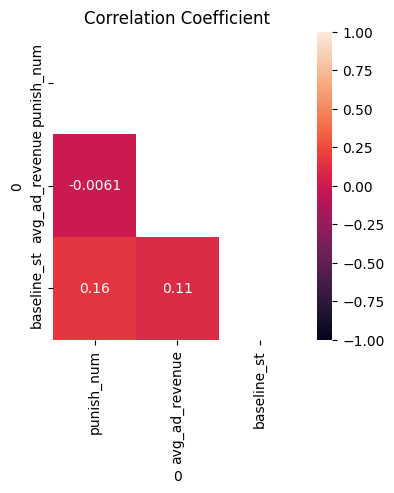

In [194]:
# get collinearity dataframe columns
corr_columns = ["punish_num", "avg_ad_revenue", "baseline_st"]
corr_df = ads[corr_columns].copy()

## check collinearity method 1
# figure size
plt.figure(figsize=(4,4))

# only show the bottom triangle
mask = np.triu(np.ones_like(corr_df.corr(), dtype = bool))

# heatmap
sns.heatmap(corr_df.corr(), annot = True, mask = mask, vmin = -1, vmax = 1)
plt.title("Correlation Coefficient")
plt.show()

In [195]:
# drop basline_st
new_ads.drop(["baseline_st"], axis = 1)

,ad_id,delivery_country,punish_num,avg_ad_revenue
0,1747578422390810,US,1,4795.25
1,1758543228094480,SA,1,1063.767
2,1738303151826990,AU,2,5.365
3,1738303920938010,NZ,2,5.365
4,1738304016410620,NZ,2,5.365
...,...,...,...,...
40674,1773472206047230,VN,0,0
40675,1773607712030720,BR,0,0
40676,1773589699308540,BE,0,0
40677,1773530511220730,TR,0,0


In [196]:
new_ads.to_csv("./cleaned_ads_dimension.csv", index = False)